### Project Overview
- Your goal is to evaluate every stock in the s&P500, and Nasdaq Adj Close as well as the daily return
- You will look for companies who too a dip (Loss for the day) as  well as companies that have spiked for the today's close

## Project approach:
- Use pandas data reader to get all Adj Close data for each stock for the year 2020 
- Will import all securities form a past project that passed properly through pandas data reader 
- Add all of resuts to a data frame
- Calculate the Daily return for each stock as well as the volitility year to date
- group Dips and Spikes - Which are worthy of investing

In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = pd.read_csv("resources/passed_Tickers.csv", index_col='Unnamed: 0')

In [3]:
tickers = list(tickers["Tickers"].values)

## Fetching the data 
 - we need ot consider companies that myay no longer exist and or have failed 
 - We also need to store the failed companies for future use

In [4]:
data = pd.DataFrame()

In [5]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

## Taking A Look at Arconic and the companies Coorelated Year to Date

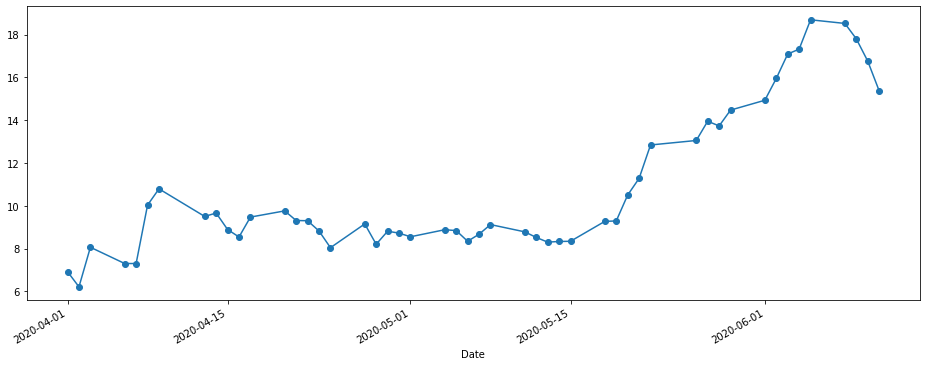

In [6]:
data["ARNC"].plot(figsize = (16,6), marker = "o")

### Passed Companies Passed 
- 471 companies passed the yahoo finance 

In [7]:
len(passed)

471

## Corr to Arconic
- Below are the top 20 companies coorelated to arconic 

In [8]:
data.corrwith(data["ARNC"]).sort_values(ascending = False).head(20)

ARNC    1.000000
RTN     1.000000
ALB     0.964966
GRMN    0.952231
PPG     0.952027
TDG     0.950921
ETFC    0.948006
MS      0.947080
F       0.944228
GD      0.943100
MTD     0.939952
VTR     0.939481
GM      0.937500
NKE     0.935470
DISH    0.935058
LB      0.933399
JCI     0.932240
GPS     0.931986
EL      0.930954
CHRW    0.930647
dtype: float64

## Daily Returns for each Stock
- We will focus on todays closing only to see which companies Dip or spikes

In [9]:
returns_df = pd.DataFrame()
for x in passed:
    data[f"{x} daily return"] = data[f"{x}"].pct_change()
    returns_df[f"{x}"] = data[f"{x}"].pct_change()

## Analysis of todays close - Spikes
- top 20 companies that had the highest daily returns at close

In [10]:
todaysdate = returns_df.tail()[-1:].iloc[0].name

In [11]:
returns_df.transpose()[todaysdate].sort_values(ascending = False).head(20)

KR      0.003991
RTN     0.000000
COL     0.000000
UTX     0.000000
AGN     0.000000
SCG     0.000000
COG    -0.004941
WMT    -0.008831
DG     -0.009730
KMB    -0.011118
CLX    -0.011433
TIF    -0.013052
CHD    -0.014305
TGT    -0.016583
CL     -0.016945
TSCO   -0.017149
REGN   -0.017195
TTWO   -0.017406
ORLY   -0.018152
EA     -0.019149
Name: 2020-06-11 00:00:00, dtype: float64

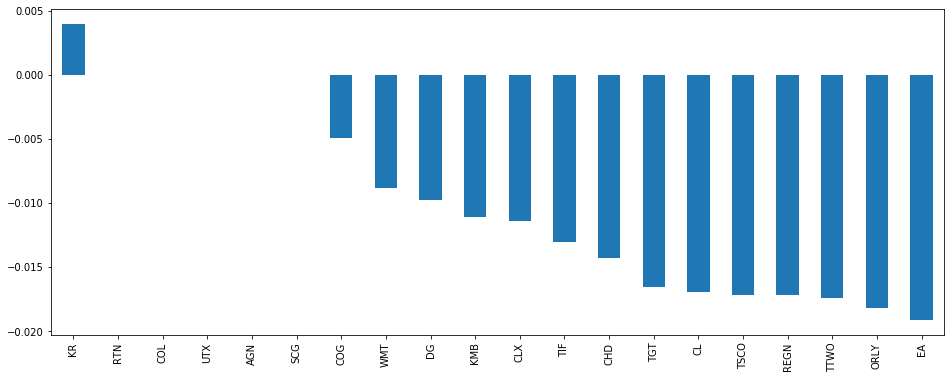

In [12]:
returns_df.transpose()[todaysdate].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (16,6))

### Dips 
- top 20 companies that had the lowest daily returns fot todays close

In [13]:
returns_df.transpose()[todaysdate].sort_values(ascending = True).head(20)

NCLH   -0.164649
BA     -0.164250
OXY    -0.161368
UAL    -0.161128
ADS    -0.158798
OKE    -0.158409
HP     -0.158108
AAL    -0.155112
HAL    -0.153687
CCL    -0.152987
M      -0.148615
BHF    -0.145078
RCL    -0.142790
ALK    -0.141996
NOV    -0.141791
DAL    -0.140329
MAC    -0.139098
APA    -0.137559
FCX    -0.136007
C      -0.133727
Name: 2020-06-11 00:00:00, dtype: float64

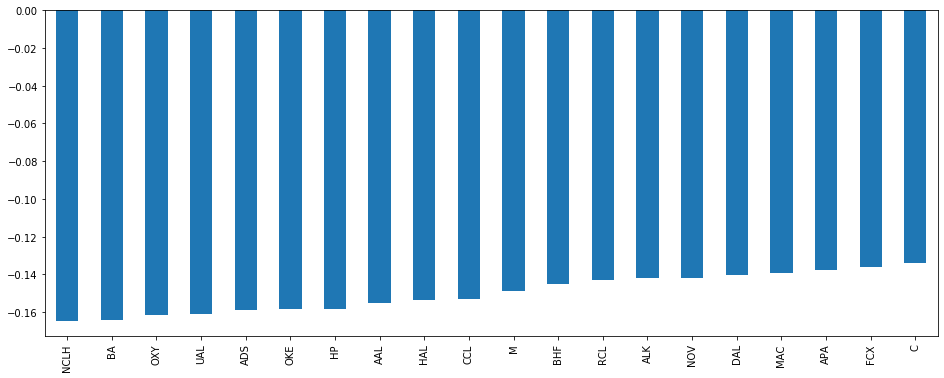

In [14]:
returns_df.transpose()[todaysdate].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

# Nasdaq - Dips and Spikes

- Fetching Data
- we will repeat the same process for the Nasdaq

In [15]:
nasdaq = pd.DataFrame()

In [16]:
nasdaq_data = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [17]:
nas_tickers = list(nasdaq_data["Ticker"].values)

In [18]:
nas_failed = []
nas_passed = []
for x in nas_tickers:
    try:
        nasdaq[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        nas_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        nas_failed.append(x)

## Daily Returns for Nasdaq

In [19]:
nas_returns = pd.DataFrame()
for x in nas_passed:
    nasdaq[f"{x} returns"] = nasdaq[f"{x}"].pct_change()
    nas_returns[f"{x}"] = nasdaq[f"{x}"].pct_change()

### Spikes
 - Top 20 companies with the higheest daily returns

In [20]:
nas_returns.transpose()[todaysdate].sort_values(ascending = False).head(20)

REGN   -0.017195
TTWO   -0.017406
ORLY   -0.018152
EA     -0.019149
NFLX   -0.020530
COST   -0.021150
INCY   -0.023968
CTXS   -0.024687
DLTR   -0.025910
EBAY   -0.026599
XEL    -0.027641
CHTR   -0.031172
NTES   -0.031860
AMZN   -0.033802
ATVI   -0.034408
BMRN   -0.035296
MELI   -0.035838
AMGN   -0.036192
MNST   -0.037479
VRTX   -0.038091
Name: 2020-06-11 00:00:00, dtype: float64

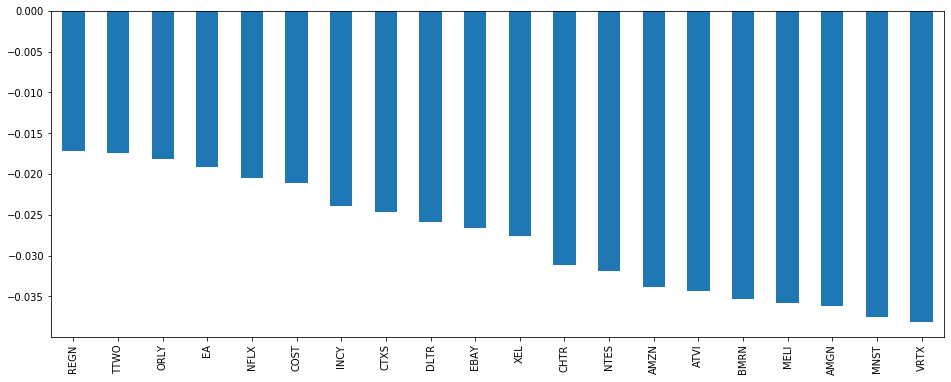

In [21]:
nas_returns.transpose()[todaysdate].sort_values(ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

## Dips
- top 20 companies with the lowest daily returns for today

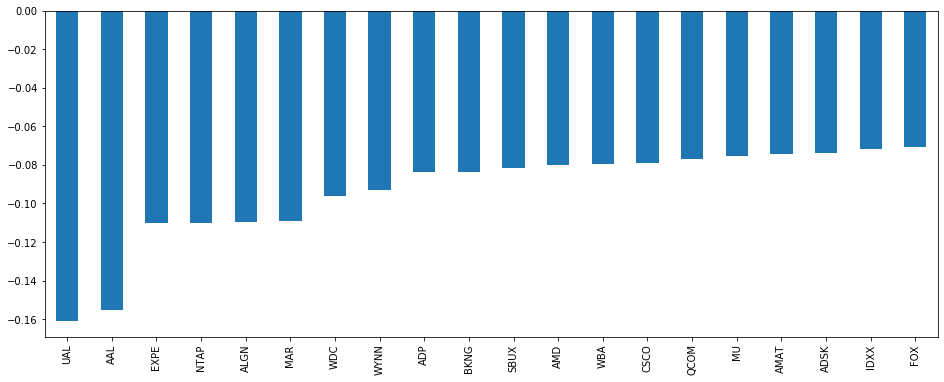

In [22]:
nas_returns.transpose()[todaysdate].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

In [23]:
nas_returns.transpose()[todaysdate].sort_values(ascending = True).head(20)

UAL    -0.161128
AAL    -0.155112
EXPE   -0.110335
NTAP   -0.109909
ALGN   -0.109433
MAR    -0.108946
WDC    -0.096051
WYNN   -0.092894
ADP    -0.083632
BKNG   -0.083620
SBUX   -0.081509
AMD    -0.080258
WBA    -0.079720
CSCO   -0.079081
QCOM   -0.076805
MU     -0.075281
AMAT   -0.074340
ADSK   -0.073925
IDXX   -0.071702
FOX    -0.070972
Name: 2020-06-11 00:00:00, dtype: float64

### S&P Vol 2020

In [24]:
cols = [x for x in returns_df]

In [25]:
sandp_vol = []
for x in returns_df.columns:
    sandp_vol.append(returns_df[f"{x}"].std())

In [26]:
s_andp_volitility = pd.DataFrame(sandp_vol, index=cols, columns=["vol"])

In [27]:
s_andp_volitility.drop("EW")

,vol
MMM,0.031727
AOS,0.029962
ABT,0.032811
ABBV,0.028582
ACN,0.034968
...,...
XYL,0.039282
YUM,0.039265
ZBH,0.041176
ZION,0.040871


### Top 10 most volitile companies - S&P 2020 - year to date

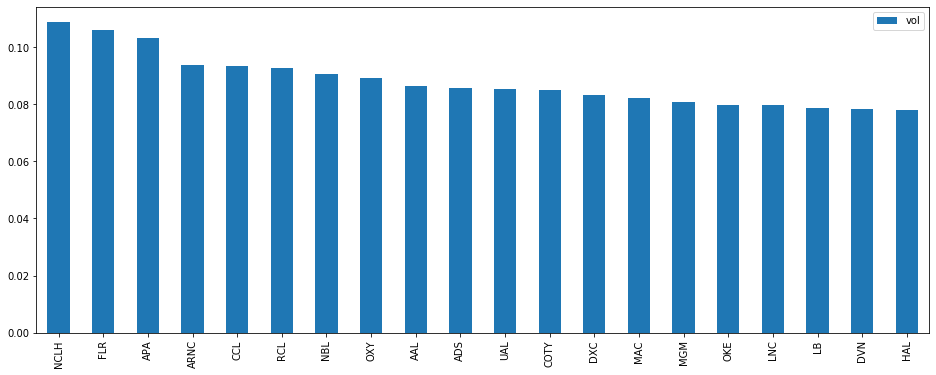

In [28]:
s_andp_volitility.drop("EW").sort_values("vol", ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

### Top 10 least volitile companies - S&P 2020 - year to date

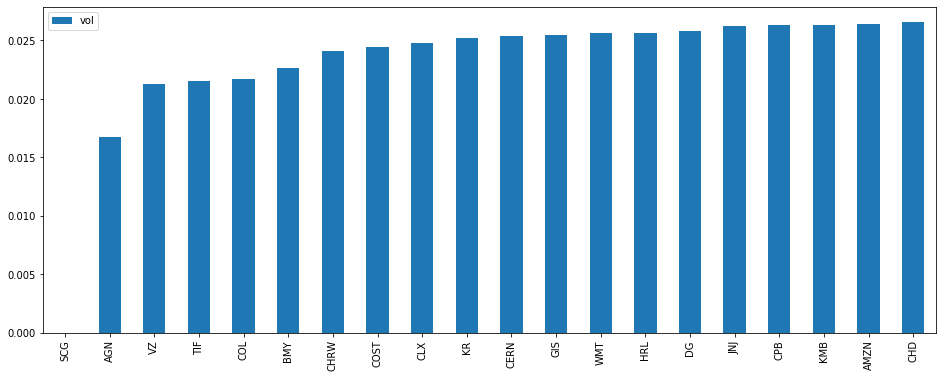

In [29]:
s_andp_volitility.sort_values("vol", ascending = True).head(20).plot(kind = "bar", figsize = (16,6))